In [ ]:
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
#https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d


In [95]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras
import os
from shutil import copyfile
import random
import matplotlib.pyplot as plt


In [96]:
print ("keras.__version__:", keras.__version__)
fig = plt.figure()
size = fig.get_size_inches()
print ("size:", size, "fig.dpi:", fig.dpi)

keras.__version__: 2.0.8
size: [ 6.  4.] fig.dpi: 72.0


In [13]:
def dirFileList(dir_path):
    return [name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]


In [55]:
categories = ['cats', 'dogs']
DATA_BASE = "/home/ubuntu/fastai/data/dogscats/"
SAMPLE_TRAIN = DATA_BASE + "sample/train/"
SAMPLE_VALID = DATA_BASE + "sample/valid/"
TRAIN        = DATA_BASE + "train/"
VALID        = DATA_BASE + "valid/"
RESULTS = DATA_BASE + "models/"
SAMPLESIZE = 1000

In [40]:
RESULTS

'/home/ubuntu/fastai/data/dogscats/models/'

In [76]:
dirList = [SAMPLE_TRAIN, SAMPLE_VALID, TRAIN, VALID]

for dir_path in dirList:
    for category in categories:
        print ("# of files in", dir_path+category, ":", len(dirFileList(dir_path+category)))

# of files in /home/ubuntu/fastai/data/dogscats/sample/train/cats : 1000
# of files in /home/ubuntu/fastai/data/dogscats/sample/train/dogs : 1000
# of files in /home/ubuntu/fastai/data/dogscats/sample/valid/cats : 1000
# of files in /home/ubuntu/fastai/data/dogscats/sample/valid/dogs : 1000
# of files in /home/ubuntu/fastai/data/dogscats/train/cats : 11500
# of files in /home/ubuntu/fastai/data/dogscats/train/dogs : 11500
# of files in /home/ubuntu/fastai/data/dogscats/valid/cats : 1004
# of files in /home/ubuntu/fastai/data/dogscats/valid/dogs : 1004


In [63]:
def dirFileList(dir_path):
    return [name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]


In [64]:
def moveListToDir(fileList, currDir, destDir):
    print ("moving ", len(fileList), " files from ", currDir, " to ", destDir)
    for file in fileList:
        #move file to destDir
        errCount = 0
        success = 0
        try:
            os.rename(currDir+"/"+file, destDir+"/"+file)
            print (currDir+"/"+file, " to ", destDir+"/"+file)
            success += 1
        except:
            errCount += 1
            print ("error moving ", currDir+"/"+file, " to ", destDir+"/"+file)
            print ("Unexpected error:", sys.exc_info()[0])
        #break
    print ("success:", success)
    print ("errCount:", errCount)


In [69]:
def copyListToDir(fileList, currDir, destDir):
    print ("moving ", len(fileList), " files from ", currDir, " to ", destDir)
    for file in fileList:
        #move file to destDir
        errCount = 0
        success = 0
        try:
            copyfile(currDir+"/"+file, destDir+"/"+file)
            #print ("copied: ", currDir+"/"+file, " to ", destDir+"/"+file)
            success += 1
        except:
            errCount += 1
            print ("error moving ", currDir+"/"+file, " to ", destDir+"/"+file)
            print ("Unexpected error:", sys.exc_info()[0])
        #break
    print ("success:", success)
    print ("errCount:", errCount)


#only run this once
sample = dirFileList(TRAIN+'cats/')
print (len(sample))
filesToMove = random.sample(sample[0:len(sample)], SAMPLESIZE)
print (len(filesToMove))
copyListToDir(filesToMove, TRAIN+'cats/', SAMPLE_TRAIN+'cats/')
print (len(dirFileList(SAMPLE_TRAIN+'cats/')))

#only run this once
sample = dirFileList(TRAIN+'dogs/')
print (len(sample))
filesToMove = random.sample(sample[0:len(sample)], SAMPLESIZE)
print (len(filesToMove))
copyListToDir(filesToMove, TRAIN+'dogs/', SAMPLE_TRAIN+'dogs/')
print (len(dirFileList(SAMPLE_TRAIN+'dogs/')))

#only run this once
sample = dirFileList(VALID+'cats/')
print (len(sample))
filesToMove = random.sample(sample[0:len(sample)], SAMPLESIZE)
print (len(filesToMove))
copyListToDir(filesToMove, VALID+'cats/', SAMPLE_VALID+'cats/')
print (len(dirFileList(SAMPLE_VALID+'cats/')))

#only run this once
sample = dirFileList(VALID+'dogs/')
print (len(sample))
filesToMove = random.sample(sample[0:len(sample)], SAMPLESIZE)
print (len(filesToMove))
copyListToDir(filesToMove, VALID+'dogs/', SAMPLE_VALID+'dogs/')
print (len(dirFileList(SAMPLE_VALID+'dogs/')))

In [77]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = SAMPLE_TRAIN        #TRAIN
validation_data_dir = SAMPLE_VALID   #VALID
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16


In [78]:
print ("K.image_data_format():", K.image_data_format())
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

K.image_data_format(): channels_last


In [100]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [102]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [103]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [104]:
print ("type(train_datagen):", type(train_datagen))

type(train_datagen): <class 'keras.preprocessing.image.ImageDataGenerator'>


In [105]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [106]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [107]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [108]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/50
125/125 [==============================] - 21s - loss: 0.7082 - acc: 0.5115 - val_loss: 0.7929 - val_acc: 0.5038
Epoch 2/50
125/125 [==============================] - 20s - loss: 0.6838 - acc: 0.5685 - val_loss: 0.6604 - val_acc: 0.6450
Epoch 3/50
125/125 [==============================] - 20s - loss: 0.6607 - acc: 0.6140 - val_loss: 0.6242 - val_acc: 0.6125
Epoch 4/50
125/125 [==============================] - 20s - loss: 0.6497 - acc: 0.6455 - val_loss: 0.5997 - val_acc: 0.6950
Epoch 5/50
125/125 [==============================] - 20s - loss: 0.6198 - acc: 0.6570 - val_loss: 0.6376 - val_acc: 0.6012
Epoch 6/50
125/125 [==============================] - 20s - loss: 0.5997 - acc: 0.6795 - val_loss: 0.5616 - val_acc: 0.7113
Epoch 7/50
125/125 [==============================] - 20s - loss: 0.5925 - acc: 0.6850 - val_loss: 0.5803 - val_acc: 0.6550
Epoch 8/50
125/125 [==============================] - 20s - loss: 0.5807 - acc: 0.7160 - val_loss: 0.6044 - val_acc: 0.6500
Epoch 9/

In [109]:
print(history.history.keys()) 
print(type(history.history['acc']))
print(type(history.history['val_acc']))

dict_keys(['acc', 'val_acc', 'loss', 'val_loss'])
<class 'list'>
<class 'list'>


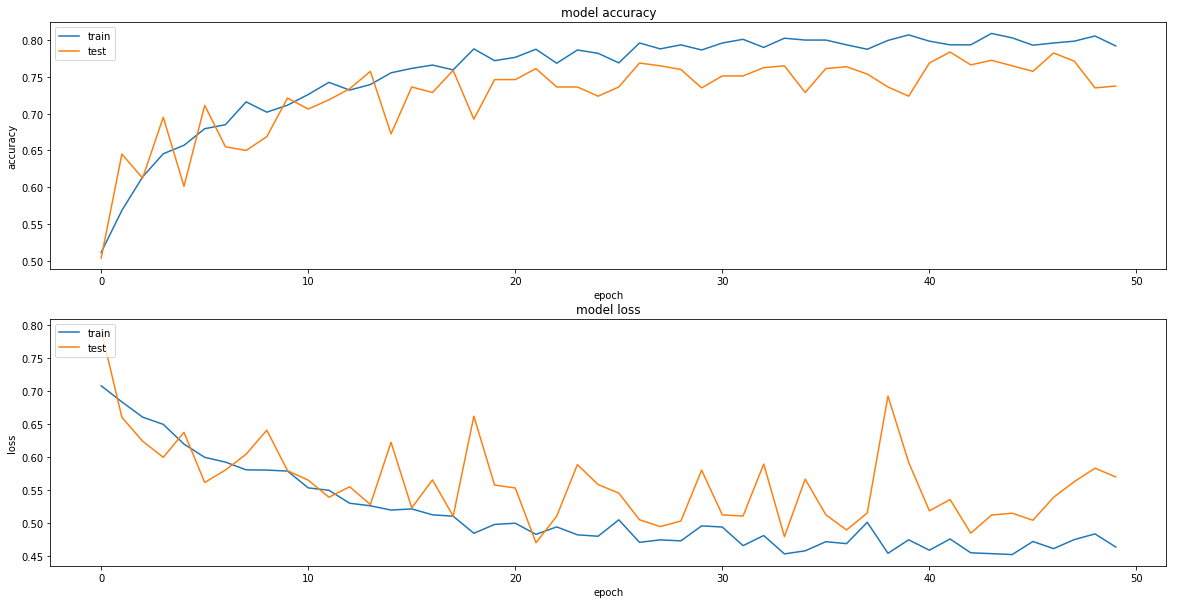

In [110]:
plt.figure(1, figsize=(20,10))  
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  


In [ ]:
print ("nb_train_samples:", nb_train_samples, ", batch_size:", batch_size, 
       ", nb_train_samples // batch_size:", nb_train_samples // batch_size)

In [ ]:
model.save_weights(RESULTS+'keras_cats_dogs_1A.h5')

In [ ]:
model.save(RESULTS+'keras_cats_dogs_1A_model.h5')

In [ ]:
from keras.models import load_model
newModel = load_model(RESULTS+'keras_cats_dogs_1A_model.h5')

In [ ]:
print (type(newModel))

In [ ]:
newModel.summary()